In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Make Some Data to Fit

**Linear Model**

$$ y = mX + b $$
$$ y = m_1X_1 + m_2 X_2 $$
$$ y = m_1X_1 + m_2 1 $$
$$ y = m_1X_1 + m_2 $$
$$ y = mX $$

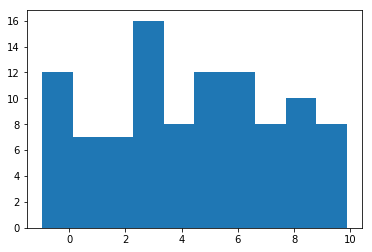

In [2]:
np.random.seed(10)
X = np.random.uniform(-1, 10, size=(100, 1))
plt.hist(X);


### Make Model

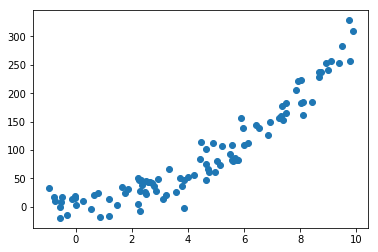

In [14]:
m = 3
b = 10
sigma = np.random.normal(0, 20, size=(100, 1))
y_obs = m * X ** 2 + b + sigma

plt.scatter(X, y_obs);

## Fitting a Line with Numpy

## Create a Column of 1s for X

In [24]:
X1 = np.hstack([X ** 2, X, np.ones_like(X)])
X1[:5]

array([[56.01814555,  7.48452708,  1.        ],
       [ 0.59556497, -0.77172856,  1.        ],
       [35.64245919,  5.97013058,  1.        ],
       [52.37189238,  7.23684271,  1.        ],
       [20.10246393,  4.48357714,  1.        ]])

In [18]:
(np_m2, np_b2), *_ = np.linalg.lstsq(X1, y_obs, rcond=-1)
np_m2, np_b2

(array([2.93779185]), array([8.31264677]))

In [22]:
x_plot = np.linspace(0, 10, 200)

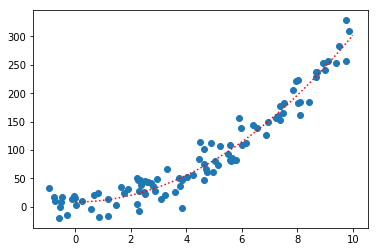

In [23]:
plt.scatter(X, y_obs);
plt.plot(x_plot, np_m2.flatten() * x_plot ** 2  + np_b2, ':r');

## Regress a line with Scipy-Stats

In [26]:
from scipy import stats
result = stats.linregress(X.flatten(), y_obs.flatten())
result

LinregressResult(slope=25.83906830683735, intercept=-21.615383953127164, rvalue=0.9228452277771775, pvalue=2.1546955472667006e-42, stderr=1.0894028385546748)

## Regression with Scikit-Learn

In [38]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ('poly', PolynomialFeatures(2)),
    ('linregress', LinearRegression())
])
model.fit(X, y_obs)
model

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linregress', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [43]:
model.named_steps['linregress'].coef_

array([[ 0.        , -0.26528497,  2.96484744]])

In [36]:
model.coef_, model.intercept_

AttributeError: 'Pipeline' object has no attribute 'coef_'

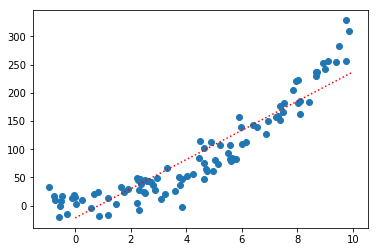

In [33]:
plt.scatter(X, y_obs);
plt.plot(x_plot, x_plot * model.coef_.flatten() + model.intercept_, ':r');

## Regression with PyMC3

/home/nickdg/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [noise]
>Metropolis: [b]
>Metropolis: [m]
Sampling 2 chains: 100%|██████████| 61000/61000 [00:18<00:00, 3321.29draws/s]
The number of effective samples is smaller than 10% for some parameters.


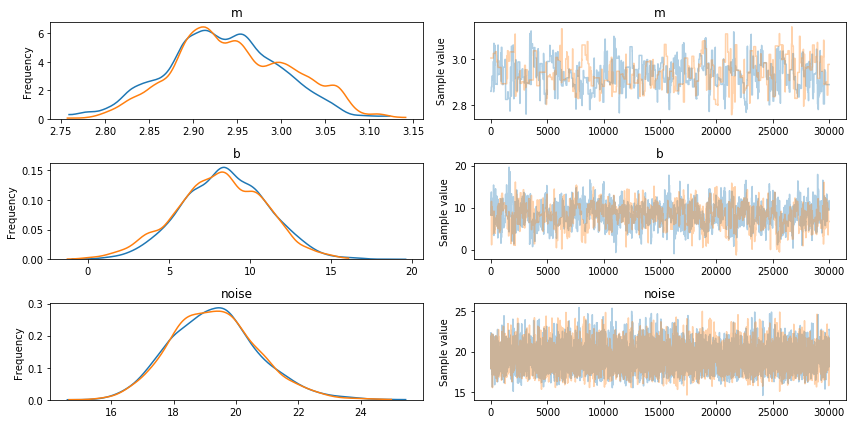

In [44]:
import pymc3 as pm

model = pm.Model()
with model:
    m = pm.Uniform('m', -1000, 1000)
    b = pm.Uniform('b', -100, 2000)
    noise = pm.HalfNormal('noise', 400)
    y = pm.Normal('y', mu = m * X ** 2 + b, sd=noise, observed=y_obs)
    
    step = pm.Metropolis()
    trace = pm.sample(30000, step=step)

pm.traceplot(trace);